# Credit Worthiness of a Customer

In [100]:
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score 
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV 
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.model_selection import cross_val_score

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


print ("Accuracy : ", accuracy_score(y_imp_test, y_imp_pred)*100, "%") 

#### Decision Tree Classification

In [128]:
dtree = DecisionTreeClassifier()
dtree.fit(x_std_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [129]:
y_pred = dtree.predict(x_std_test)

Confusion Matrix : 
 [[3772  901]
 [ 801  526]]


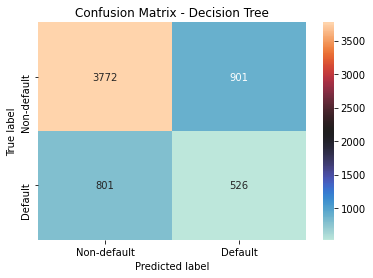

In [130]:
cm = confusion_matrix(y_test, y_pred) 
print ("Confusion Matrix : \n", cm) 

sns.heatmap(cm ,annot=True, cmap="icefire", fmt="d", 
            xticklabels = ['Non-default', 'Default'], 
            yticklabels = ['Non-default', 'Default'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - Decision Tree");

In [131]:
print ("Accuracy : ", accuracy_score(y_test, y_pred)*100, "%") 

Accuracy :  71.63333333333334 %


#### Random Forest Classification

In [132]:
rf = RandomForestClassifier()
rf.fit(x_std_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [133]:
y_pred = rf.predict(x_std_test)

In [143]:
cv_results_lrO = cross_val_score(lrO , x_train, y_train, scoring = 'accuracy')
print ("Logistic Regression using original data : ", cv_results_lrO.mean())

cv_results_lrStd = cross_val_score(lrStd , x_std_train, y_train, scoring = 'accuracy')
print ("Logistic Regression using standardized data : ", cv_results_lrStd.mean())

cv_results_lrRFE = cross_val_score(lrRFE , x_imp_train, y_imp_train, scoring = 'accuracy')
print ("Logistic Regression using RFE data : ", cv_results_lrRFE.mean())

cv_results_dt = cross_val_score(dtree , x_std_train, y_train, scoring = 'accuracy')
print ("Decision Tree using standardised data : ", cv_results_dt.mean())

cv_results_rf = cross_val_score(rf , x_std_train, y_train, scoring = 'accuracy')
print ("Random Forest using original data : ", cv_results_rf.mean())

Logistic Regression using original data :  0.7787916666666667
Logistic Regression using standardized data :  0.8112916666666667
Logistic Regression using RFE data :  0.8129583333333332
Decision Tree using standardised data :  0.7277916666666667
Random Forest using original data :  0.8221666666666667


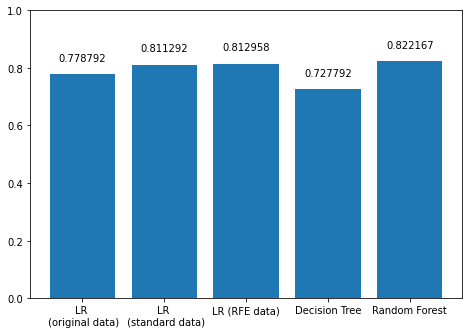

In [144]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_ylim([0,1])
models = ['LR \n (original data)', 'LR \n (standard data)', 'LR (RFE data)', 'Decision Tree', 'Random Forest']
accuracy = [cv_results_lrO.mean(), cv_results_lrStd.mean(), cv_results_lrRFE.mean(), cv_results_dt.mean(), cv_results_rf.mean()]
temp = ax.bar(models, accuracy)
for t in temp:
        height = t.get_height()
        ax.text(t.get_x() + t.get_width()/2., 1.05*height, '%f' % float(height), ha='center', va='bottom')
plt.show()